In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import skew
import seaborn as sns

In [2]:
# importing all the datasets
# airbnb_users_test_df = pd.read_csv('test_users.csv')
airbnb_users_train_df = pd.read_csv("train_users_2.csv")
# airbnb_users_train_df = pd.concat([airbnb_users_test_df,airbnb_users_train_df])

In [3]:
sessions_df = pd.read_csv("sessions.csv")
sessions_df

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [4]:
countries_df = pd.read_csv("countries.csv")
countries_df

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [5]:
age_gender_bkts_df = pd.read_csv("age_gender_bkts.csv")
age_gender_bkts_df

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
...,...,...,...,...,...
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0


USERS TRAINING DATA CLEANING

In [6]:
# displaying the shape of the dataset
airbnb_users_train_df.shape

(213451, 16)

In [7]:
# data type of each column in the dataset
airbnb_users_train_df.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

HANDLING NULL VALUES

In [8]:
# checking for null values
airbnb_users_train_df.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

1.From the above null values analysis we can see that there are null values in the columns 'date_first_booking','age','first_affiliate_tracked'.
2. The null values in the column 'date_first_booking' indicates that the user hasn't done a booking yet.
3. Now let's check if there is no destination found when the user doesn't have a first booking yet.

In [9]:
# cross verifying our assumption that if there is no booking made by the customer then the country destination is NDF(No Destination Found)  
a=airbnb_users_train_df['date_first_booking'].isna()
b=airbnb_users_train_df['country_destination']=="NDF"
ind =  airbnb_users_train_df[ a & b ]
ind

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
11,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF
13,dy3rgx56cu,2010-01-05,20100105083259,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF
14,ju3h98ch3w,2010-01-07,20100107055820,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


YES! our assumption is true.So, for the null value in the column 'date_first_booking' instead of dropping them replacing null values by letter NB:No Booking is more appropriate.

In [10]:
# Replacing the null values of the 'date_first_booking' column by the NB:NO BOOKING.
airbnb_users_train_df['date_first_booking'].fillna('NB',inplace=True)
airbnb_users_train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NB,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NB,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NB,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NB,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NB,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NB,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


For the 'age' column there are approximately  87990 null values removing all these would push us to loose alot of information.So instead we can replace the null values by the avg value of the 'age' column.
But before computing the avg value we need to check for any potential outliers and remove them from the data.
Inorder to check for outliers excluding the null values and remove any outliers present and then compute the average of the new data and replace the null values with the computed average.


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd1d0068070>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd1d0068610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd1d004bd60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd1d0068bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1d0068e80>],
 'means': []}

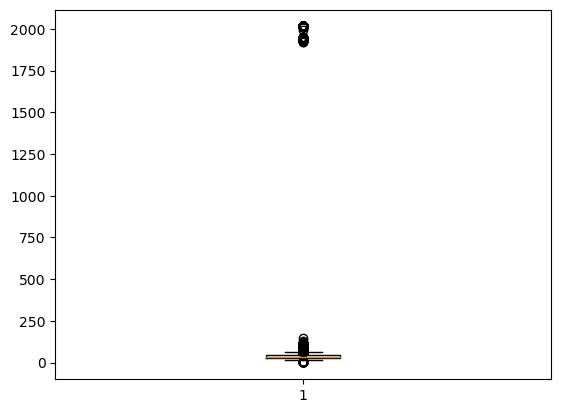

In [11]:
no_null_age =  airbnb_users_train_df['age'].dropna(how='any')
# checking for outliers in the data.
plt.boxplot(no_null_age)

Looking at the box plot we can say that the data definetly has outliers.We can also observe that the ouliers are around 2000.so we remove the outliers

In [12]:
# fetching the indexes of the null values in the age column.
null_indexes = airbnb_users_train_df[airbnb_users_train_df['age'].isna()].index



In [13]:
#Removing the rows with the null values in the age column by accessing the null value indexes from above.
non_null_age_df = airbnb_users_train_df.drop(labels=null_indexes,axis='index')
# Handling the Outliers using Inter Quartile Range.
# From remaining non null data of the age column calculationg the 25 and 75 percentile values.
percentile_25=np.percentile(non_null_age_df['age'],25)
percentile_75=np.percentile(non_null_age_df['age'],75)
# Calculating the IQR value and setting the lower and upper limit.
IQR = percentile_75 - percentile_25
lower_limit = percentile_25 - 1.5*IQR
upper_limit = percentile_75 + 1.5*IQR
# Removing the outliers by selecting values that are between the lower limit and upper limit range.
no_out=non_null_age_df[(non_null_age_df['age']>lower_limit) & (non_null_age_df['age']<upper_limit)]
# Calculating the average value of the age column with out the null values and eliminating the outliers 
mean = no_out['age'].mean()
no_out

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,20090523174809,NB,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US
213445,qbxza0xojf,2014-06-30,20140630235547,2014-07-02,FEMALE,23.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,US
213446,zxodksqpep,2014-06-30,20140630235636,NB,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF


In [14]:
# Now we fill the null values with the mean of the data.
airbnb_users_train_df.fillna(mean,inplace=True)
airbnb_users_train_df = airbnb_users_train_df[(airbnb_users_train_df['age']>lower_limit)&(airbnb_users_train_df['age']<upper_limit)]
airbnb_users_train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NB,-unknown-,35.595785,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NB,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NB,MALE,32.000000,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NB,-unknown-,35.595785,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NB,-unknown-,32.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NB,-unknown-,35.595785,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd1d0aaf250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd1d0aaf7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd1d0aa2f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd1d0aafd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1d0abe0a0>],
 'means': []}

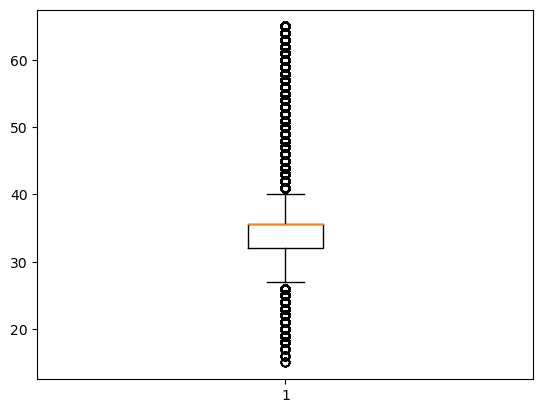

In [15]:
# Plotting a box plot to see the distribution after removing the null values.
plt.boxplot(airbnb_users_train_df['age'])

In [16]:
# re-checking for any null values
airbnb_users_train_df.isna().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

In [17]:
airbnb_users_train_df.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd1d13cbbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd1d13db1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd1d13cb910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd1d13db760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1d13dba30>],
 'means': []}

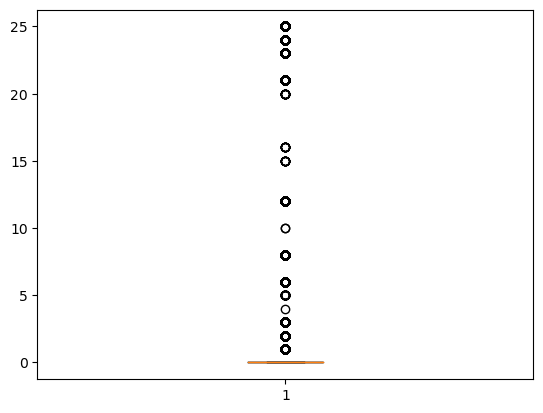

In [18]:
# checking the distribution of the 'sign_up' column data.
plt.boxplot(airbnb_users_train_df['signup_flow'])

In [19]:
# checking for duplicated rows
airbnb_users_train_df.duplicated().sum()

0

In [20]:
# after removing the specific rows and columns resetting the index of the dataframe to attain consistency in the data indexing.
resetted_index_df = airbnb_users_train_df.reset_index()
airbnb_users_train_df = resetted_index_df.drop(labels=['index'],axis='columns')

In [21]:
airbnb_users_train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NB,-unknown-,35.595785,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NB,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207852,zxodksqpep,2014-06-30,20140630235636,NB,MALE,32.000000,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
207853,mhewnxesx9,2014-06-30,20140630235719,NB,-unknown-,35.595785,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
207854,6o3arsjbb4,2014-06-30,20140630235754,NB,-unknown-,32.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
207855,jh95kwisub,2014-06-30,20140630235822,NB,-unknown-,35.595785,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


Now we can try to analyse the difference in time between the account creation and the first booking

In [22]:
# Fetch the indexes of the data that have a first_booking so that we can get only the data that have destination country found.
dest_booked_indexes = airbnb_users_train_df[airbnb_users_train_df['date_first_booking']!="NB"].index
dest_booked_indexes

Int64Index([     2,      3,      4,      5,      6,      7,      8,      9,
                10,     12,
            ...
            207813, 207814, 207815, 207816, 207818, 207821, 207845, 207847,
            207849, 207851],
           dtype='int64', length=86010)

In [23]:
airbnb_users_train_df.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [24]:

# creating a numpy array of the size same as the row size in the data and filling each value with "NB"
months_taken_first_booking = np.full(shape=airbnb_users_train_df.shape[0],fill_value="NB")
# Iterating through all the destination booked indexes and replacing the corresponding index values in the above defined numpy array to the 
# Time taken between account creation and first_booking
for dest_booked_index,ind in zip(dest_booked_indexes,months_taken_first_booking):
    dest_booked_date_str = airbnb_users_train_df['date_first_booking'].iloc[dest_booked_index]
    acnt_date_str = airbnb_users_train_df['date_account_created'].iloc[dest_booked_index]
    # converting the dates from string to date time 
    acnt_date = datetime.strptime(acnt_date_str, '%Y-%m-%d')
    dest_booked_date = datetime.strptime(dest_booked_date_str, '%Y-%m-%d')
    # Time taken between account creation and first booking.
    months = abs((dest_booked_date - acnt_date).days)
    months_taken_first_booking[dest_booked_index] = str(months  )

In [25]:
# Creating a new relevant column to the dataset to capture hidden relationships
airbnb_users_train_df['time_to_first_booking']=months_taken_first_booking

In [26]:
airbnb_users_train_df.isna().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
time_to_first_booking      0
dtype: int64

In [27]:
# Changing the data type of the column 'date_account_created' from object to datetime
airbnb_users_train_df['date_account_created']=pd.to_datetime(airbnb_users_train_df['date_account_created'])
airbnb_users_train_df.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active              int64
date_first_booking                 object
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
time_to_first_booking              object
dtype: object

In [28]:
# Removing Irrelevant columns
# The column 'signup flow' indicates the page a user came to signup up from which is ir-relevant to our target of predicting the next holiday destination for an individual.
airbnb_users_train_df.drop(labels=['signup_flow'],axis='columns',inplace=True) 
airbnb_users_train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,time_to_first_booking
0,gxn3p5htnn,2010-06-28,20090319043255,NB,-unknown-,35.595785,facebook,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NB
1,820tgsjxq7,2011-05-25,20090523174809,NB,MALE,38.000000,facebook,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NB
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,en,direct,direct,untracked,Web,Windows Desktop,IE,US,57
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,27
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.000000,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207852,zxodksqpep,2014-06-30,20140630235636,NB,MALE,32.000000,basic,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,NB
207853,mhewnxesx9,2014-06-30,20140630235719,NB,-unknown-,35.595785,basic,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,NB
207854,6o3arsjbb4,2014-06-30,20140630235754,NB,-unknown-,32.000000,basic,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,NB
207855,jh95kwisub,2014-06-30,20140630235822,NB,-unknown-,35.595785,basic,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,NB


EDA

In [29]:
# Finding the Basic statiscs of each column with numericals in it.
airbnb_users_train_df['age'].describe()

count    207857.000000
mean         35.595785
std           7.702082
min          15.000000
25%          32.000000
50%          35.595785
75%          35.595785
max          65.000000
Name: age, dtype: float64

In [30]:
c = airbnb_users_train_df[airbnb_users_train_df['time_to_first_booking']!="NB"]
c['time_to_first_booking'] = c['time_to_first_booking'].astype(int)
c['time_to_first_booking'].describe()

/var/folders/zz/trdpl0vs44v8456fx08dwzk80000gn/T/ipykernel_27643/1337755055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['time_to_first_booking'] = c['time_to_first_booking'].astype(int)


count    86010.000000
mean        11.737507
std         18.210170
min          0.000000
25%          1.000000
50%          3.000000
75%         16.000000
max         99.000000
Name: time_to_first_booking, dtype: float64

In [31]:
airbnb_users_train_df.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active              int64
date_first_booking                 object
gender                             object
age                               float64
signup_method                      object
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
time_to_first_booking              object
dtype: object

In [32]:
# Looking at the different categories for the important object columns
airbnb_users_train_df['signup_method'].value_counts()

basic       149128
facebook     58184
google         545
Name: signup_method, dtype: int64

(array([55746., 11462.,  7734.,  5141.,  1368.,  1201.,   994.,   869.,
          782.,   713.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

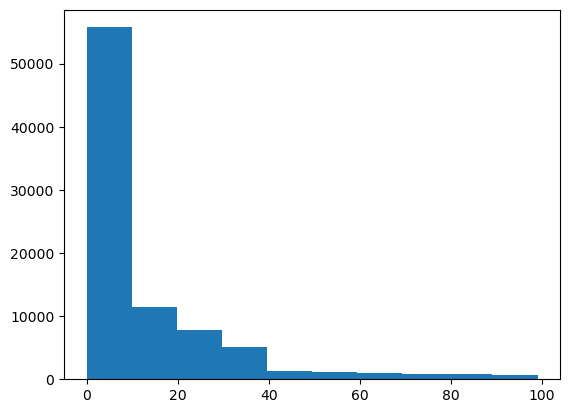

In [33]:
# Looking at the distribution of the time taken between account creation and first booking.
plt.hist(c['time_to_first_booking'])

(array([  1872.,   8906.,  27143.,  28551., 107009.,  11740.,   8470.,
          6051.,   4470.,   3645.]),
 array([15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65.]),
 <BarContainer object of 10 artists>)

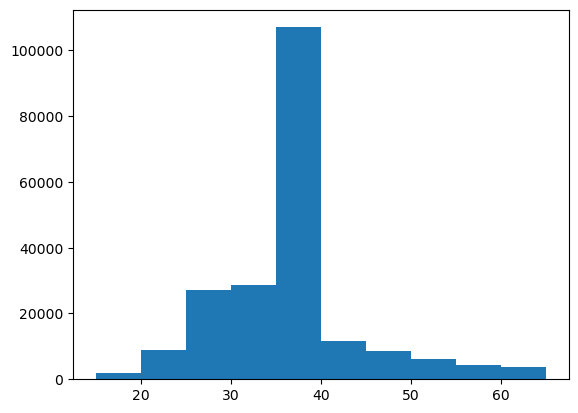

In [34]:
# Analysing the distribution of the age of the customers.
plt.hist(airbnb_users_train_df['age'])

In [35]:

# Generating a skewness factor to check if the data is highly skewed.
age_skew = skew(airbnb_users_train_df['age'])
days_skew = skew(c['time_to_first_booking'])
print(f'skewness factor for the column age is:{age_skew} and for column time_to_first_booking is:{days_skew}')

skewness factor for the column age is:1.1344351704276794 and for column time_to_first_booking is:2.355764509177639


It can be understood that the time taken by individuals from their first_booking to the day of account created is highly skewed to the left.
This means that the individuals do not take much time from from booking a destination after creating an account or vice-versa.
This is good to know since it signifies they are interested in the product. 

In [36]:
# Grouping the data into three bins based on the customers age.
# Bin 1: Young age with age<=35
# Bin 2: Middle age with 36<= age <= 50
# Bin 2: Adult age>=51

# creating a new column called 'age_group' and selecting the default bin as 'Middle age'
airbnb_users_train_df['age_group']= np.full(shape=airbnb_users_train_df.shape[0],fill_value="Middle_age")
# Fetching the indexes where age <=35 or age>=51
# Replacing the values at the corresponding indexes in the 'age_group' column by their appropriate age group assignment.
young_age_indexes = airbnb_users_train_df[airbnb_users_train_df['age']<=35].index
adult_indexes = airbnb_users_train_df[airbnb_users_train_df['age']>=51].index
airbnb_users_train_df.loc[young_age_indexes,"age_group"] = "Young_age"
airbnb_users_train_df.loc[adult_indexes,"age_group"] = "Adult_age"





In [37]:
airbnb_users_train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,time_to_first_booking,age_group
0,gxn3p5htnn,2010-06-28,20090319043255,NB,-unknown-,35.595785,facebook,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NB,Middle_age
1,820tgsjxq7,2011-05-25,20090523174809,NB,MALE,38.000000,facebook,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NB,Middle_age
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,en,direct,direct,untracked,Web,Windows Desktop,IE,US,57,Adult_age
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,27,Middle_age
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.000000,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,20,Middle_age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207852,zxodksqpep,2014-06-30,20140630235636,NB,MALE,32.000000,basic,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,NB,Young_age
207853,mhewnxesx9,2014-06-30,20140630235719,NB,-unknown-,35.595785,basic,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,NB,Middle_age
207854,6o3arsjbb4,2014-06-30,20140630235754,NB,-unknown-,32.000000,basic,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,NB,Young_age
207855,jh95kwisub,2014-06-30,20140630235822,NB,-unknown-,35.595785,basic,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,NB,Middle_age


In [38]:
# Generating Freq table for customers grouped by destination country for each age group category.
country_age_group_freq =pd.crosstab(airbnb_users_train_df['country_destination'],airbnb_users_train_df['age_group'])

In [39]:
country_age_group_freq

age_group,Adult_age,Middle_age,Young_age
country_destination,,,
AU,50,247,224
CA,118,684,581
DE,94,446,481
ES,142,964,1073
FR,432,2412,2001
GB,243,1056,924
IT,224,1350,1141
NDF,6309,84431,31107
NL,53,318,358


In [40]:
# Creating a new column called 'year_account_created' for fetching only the year from the 'date_account_created' column
airbnb_users_train_df['year_account_created'] = pd.DatetimeIndex(airbnb_users_train_df['date_account_created']).year

<AxesSubplot:xlabel='Year', ylabel='Accounts_created'>

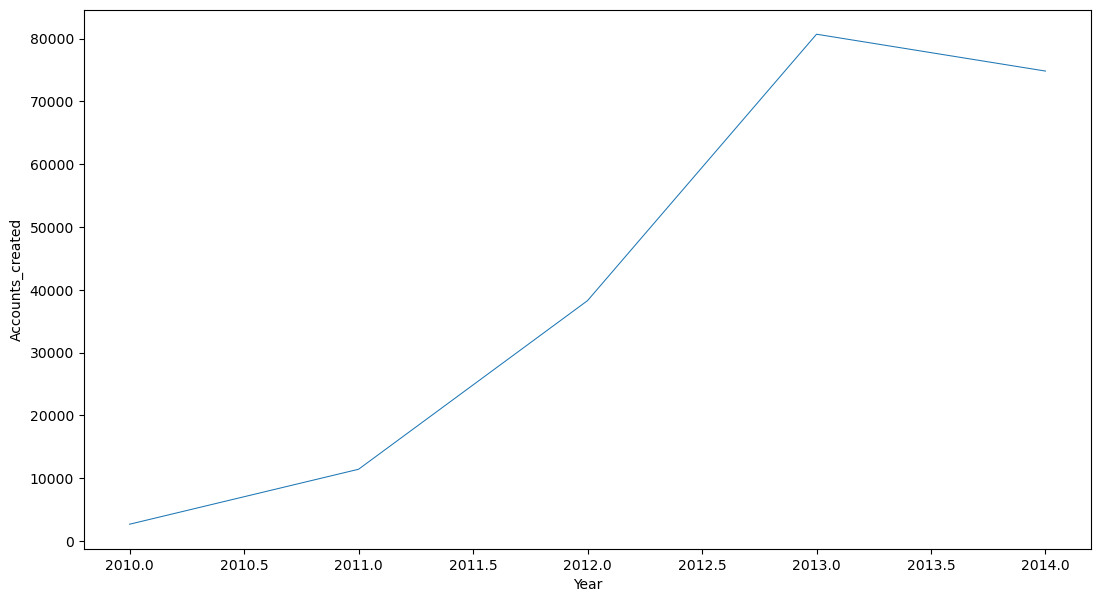

In [41]:
# Generating a line graph of the total accounts created year by year
import seaborn as sns
plt.figure(figsize=(13,7))
creation_year = airbnb_users_train_df['year_account_created'].value_counts()
dic={
    'Year':creation_year.index,
    'Accounts_created':creation_year
}
df=pd.DataFrame(data=dic)
df.set_index(keys='Year',inplace=True)
df
sns.lineplot(x=df.index, y=df['Accounts_created'], size=1, legend=None)

In [42]:
airbnb_users_train_df['year_account_created'].value_counts()

2013    80690
2014    74823
2012    38268
2011    11415
2010     2661
Name: year_account_created, dtype: int64

<AxesSubplot:xlabel='country_destination', ylabel='age'>

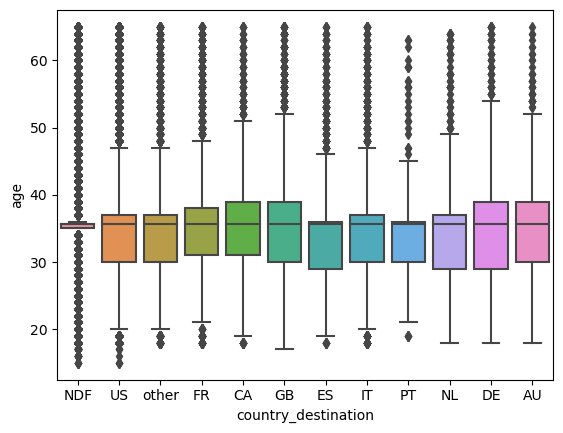

In [43]:
# Generating a box plot for analysing the distribution of age for each destination country category.
sns.boxplot(x = airbnb_users_train_df['country_destination'],
            y = airbnb_users_train_df['age'])

In [44]:
sessions_df

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [45]:
# Dropping the null values from the sessions data
sessions_df.dropna(axis='index',how='any',inplace=True)

In [46]:
sessions_df

,user_id,action,action_type,action_detail,device_type,secs_elapsed
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [47]:
airbnb_users_train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,time_to_first_booking,age_group,year_account_created
0,gxn3p5htnn,2010-06-28,20090319043255,NB,-unknown-,35.595785,facebook,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NB,Middle_age,2010
1,820tgsjxq7,2011-05-25,20090523174809,NB,MALE,38.000000,facebook,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NB,Middle_age,2011
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,en,direct,direct,untracked,Web,Windows Desktop,IE,US,57,Adult_age,2010
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,27,Middle_age,2011
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.000000,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,20,Middle_age,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207852,zxodksqpep,2014-06-30,20140630235636,NB,MALE,32.000000,basic,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,NB,Young_age,2014
207853,mhewnxesx9,2014-06-30,20140630235719,NB,-unknown-,35.595785,basic,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,NB,Middle_age,2014
207854,6o3arsjbb4,2014-06-30,20140630235754,NB,-unknown-,32.000000,basic,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,NB,Young_age,2014
207855,jh95kwisub,2014-06-30,20140630235822,NB,-unknown-,35.595785,basic,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,NB,Middle_age,2014


<AxesSubplot:ylabel='gender'>

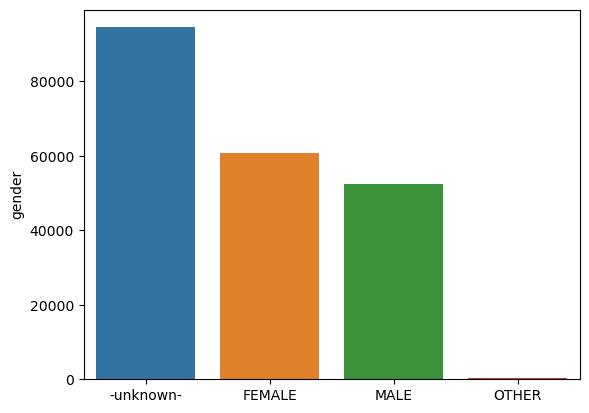

In [48]:
# Generating a box plot to see the freq of the 'gender' column categories
age_freq=airbnb_users_train_df['gender'].value_counts()
sns.barplot(x=age_freq.index,y=age_freq)

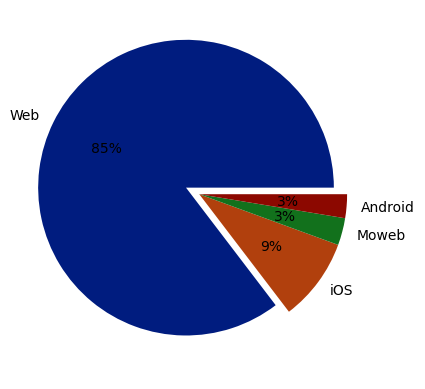

In [49]:
# Generating a pie chart for the distribution of the apps used while signing In
platform_freq = airbnb_users_train_df['signup_app'].value_counts()

values = platform_freq
label = platform_freq.index
palette_color = sns.color_palette('dark')
plt.pie(values,labels=label,colors=palette_color,explode=[0.1,0,0,0],autopct='%.0f%%')
plt.show()

In [50]:
platform_freq

Web        177452
iOS         18832
Moweb        6167
Android      5406
Name: signup_app, dtype: int64

<AxesSubplot:xlabel='age'>

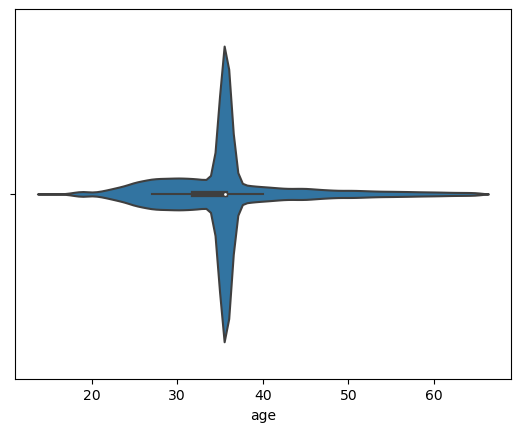

In [51]:
# Label Encoding the categorical columns
sns.violinplot(x=airbnb_users_train_df['age'])

In [52]:
airbnb_users_train_df.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active              int64
date_first_booking                 object
gender                             object
age                               float64
signup_method                      object
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
time_to_first_booking              object
age_group                          object
year_account_created                int64
dtype: object

In [53]:
# Label Encoding the categorical variables to make the data ready to be fed to a machine learning algorithm
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
airbnb_users_train_df.drop(labels=['age_group','time_to_first_booking','timestamp_first_active','date_account_created','id','date_first_booking','first_affiliate_tracked'],axis="columns",inplace=True)


In [54]:
airbnb_users_train_df

,gender,age,signup_method,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination,year_account_created
0,-unknown-,35.595785,facebook,en,direct,direct,Web,Mac Desktop,Chrome,NDF,2010
1,MALE,38.000000,facebook,en,seo,google,Web,Mac Desktop,Chrome,NDF,2011
2,FEMALE,56.000000,basic,en,direct,direct,Web,Windows Desktop,IE,US,2010
3,FEMALE,42.000000,facebook,en,direct,direct,Web,Mac Desktop,Firefox,other,2011
4,-unknown-,41.000000,basic,en,direct,direct,Web,Mac Desktop,Chrome,US,2010
...,...,...,...,...,...,...,...,...,...,...,...
207852,MALE,32.000000,basic,en,sem-brand,google,Web,Mac Desktop,Safari,NDF,2014
207853,-unknown-,35.595785,basic,en,direct,direct,Web,Windows Desktop,Chrome,NDF,2014
207854,-unknown-,32.000000,basic,en,direct,direct,Web,Mac Desktop,Firefox,NDF,2014
207855,-unknown-,35.595785,basic,en,other,other,iOS,iPhone,Mobile Safari,NDF,2014


In [55]:
airbnb_users_train_df['signup_method'] = le.fit_transform(airbnb_users_train_df['signup_method'])
airbnb_users_train_df['language'] = le.fit_transform(airbnb_users_train_df['language'])
airbnb_users_train_df['affiliate_provider'] = le.fit_transform(airbnb_users_train_df['affiliate_provider'])
airbnb_users_train_df['signup_app'] = le.fit_transform(airbnb_users_train_df['signup_app'])
airbnb_users_train_df['first_device_type'] = le.fit_transform(airbnb_users_train_df['first_device_type'])
airbnb_users_train_df['first_browser'] = le.fit_transform(airbnb_users_train_df['first_browser'])
airbnb_users_train_df['country_destination'] = le.fit_transform(airbnb_users_train_df['country_destination'])
airbnb_users_train_df['gender'] = le.fit_transform(airbnb_users_train_df['gender'])
airbnb_users_train_df['affiliate_channel'] = le.fit_transform(airbnb_users_train_df['affiliate_channel'])
airbnb_users_train_df['country_destination'] = le.fit_transform(airbnb_users_train_df['country_destination'])

In [56]:
airbnb_users_train_df['country_destination']

0          7
1          7
2         10
3         11
4         10
          ..
207852     7
207853     7
207854     7
207855     7
207856     7
Name: country_destination, Length: 207857, dtype: int64

In [57]:
# Stnadardising the data to make the entire data consistent by making them have mean = 0 and variance = 1.
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(airbnb_users_train_df)

In [58]:
scaled_data

array([[-9.75957788e-01,  9.22535497e-16,  1.56328062e+00, ...,
        -7.49198050e-01, -4.41606103e-01, -3.23075268e+00],
       [ 1.46305076e+00,  3.12152002e-01,  1.56328062e+00, ...,
        -7.49198050e-01, -4.41606103e-01, -2.16366117e+00],
       [ 2.43546486e-01,  2.64918792e+00, -6.23637262e-01, ...,
         1.74244352e-01,  1.14124158e+00, -3.23075268e+00],
       ...,
       [-9.75957788e-01, -4.66859970e-01, -6.23637262e-01, ...,
        -1.09891772e-01, -4.41606103e-01,  1.03761336e+00],
       [-9.75957788e-01,  9.22535497e-16, -6.23637262e-01, ...,
         7.42516599e-01, -4.41606103e-01,  1.03761336e+00],
       [-9.75957788e-01,  9.22535497e-16, -6.23637262e-01, ...,
        -1.31747030e+00, -4.41606103e-01,  1.03761336e+00]])

In [154]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve 

In [60]:
regressionModel = LinearRegression() # Creating an object of Linear Regression class.

In [62]:
y = airbnb_users_train_df['country_destination']

In [89]:
y

0          7
1          7
2         10
3         11
4         10
          ..
207852     7
207853     7
207854     7
207855     7
207856     7
Name: country_destination, Length: 207857, dtype: int64

In [63]:
y.columns=[['country_destination']]

In [64]:
y = y.reset_index(drop=True)

In [65]:
y.head()

0     7
1     7
2    10
3    11
4    10
Name: country_destination, dtype: int64

In [66]:
X = airbnb_users_train_df.drop(columns='country_destination',axis=1)

In [91]:
airbnb_users_train_df.corr()

,gender,age,signup_method,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination,year_account_created
gender,1.000000,0.005579,0.478388,0.011138,-0.047415,0.038487,0.020717,-0.054559,-0.001672,0.105676,-0.110671
age,0.005579,1.000000,-0.044971,-0.042885,0.068723,0.015867,-0.016661,0.015500,0.083813,-0.023974,-0.071310
signup_method,0.478388,-0.044971,1.000000,0.035553,-0.072106,0.091070,-0.023406,-0.051296,-0.031548,-0.007413,-0.066155
language,0.011138,-0.042885,0.035553,1.000000,-0.005449,0.018953,-0.001120,0.029456,-0.023569,-0.005353,0.029440
affiliate_channel,-0.047415,0.068723,-0.072106,-0.005449,1.000000,0.379863,0.009698,-0.046843,0.088042,-0.007577,-0.018169
affiliate_provider,0.038487,0.015867,0.091070,0.018953,0.379863,1.000000,-0.075905,0.009947,-0.013082,-0.016304,0.015286
signup_app,0.020717,-0.016661,-0.023406,-0.001120,0.009698,-0.075905,1.000000,0.313600,-0.033537,-0.001007,0.023026
first_device_type,-0.054559,0.015500,-0.051296,0.029456,-0.046843,0.009947,0.313600,1.000000,-0.287648,-0.024569,0.086403
first_browser,-0.001672,0.083813,-0.031548,-0.023569,0.088042,-0.013082,-0.033537,-0.287648,1.000000,-0.003973,-0.029952
country_destination,0.105676,-0.023974,-0.007413,-0.005353,-0.007577,-0.016304,-0.001007,-0.024569,-0.003973,1.000000,-0.024324


In [90]:
X

,gender,age,signup_method,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,year_account_created
0,0,35.595785,1,5,2,4,2,3,8,2010
1,2,38.000000,1,5,7,8,2,3,8,2011
2,1,56.000000,0,5,2,4,2,6,21,2010
3,1,42.000000,1,5,2,4,2,3,17,2011
4,0,41.000000,0,5,2,4,2,3,8,2010
...,...,...,...,...,...,...,...,...,...,...
207852,2,32.000000,0,5,5,8,2,3,41,2014
207853,0,35.595785,0,5,2,4,2,6,8,2014
207854,0,32.000000,0,5,2,4,2,3,17,2014
207855,0,35.595785,0,5,3,12,3,8,29,2014


In [67]:
# Splitting the X and y into X_train, y_train, X_test and y_test using the train_test_split function.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [108]:
# To display the shapes of the X_train, X_test, y_train and y_test
print("Shape of the X_train is :",X_train.shape)
print("Shape of the y_train is :",y_train.shape)
print("Shape of X_test is :", X_test.shape)
print("Shape of the y_test is :",y_test.shape)

Shape of the X_train is : (166285, 10)
Shape of the y_train is : (166285,)
Shape of X_test is : (41572, 10)
Shape of the y_test is : (41572,)


# Gaussian Naive Bayes

The accuracy of Gaussian Naive Bayes Classifier is:  0.559246608294044


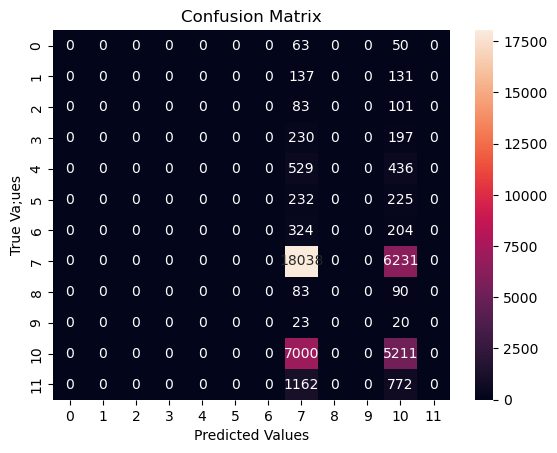

In [170]:

# Importing the required library to implement Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Creating an object gaussianNBModel of class GaussianNB
gaussianNBModel = GaussianNB()

# Using the fit function of GaussianNB class the data has been fit
gaussianNBModel.fit(X_train,y_train)

# Making predictions using the predict function of GaussianNB class on the X_test dataset
gnbPredictions = gaussianNBModel.predict(X_test)

print('The accuracy of Gaussian Naive Bayes Classifier is: ',accuracy_score(y_test,gnbPredictions))

sns.heatmap(confusion_matrix(y_test, gnbPredictions), annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('True Va;ues')
plt.title('Confusion Matrix')
plt.show()


# RANDOM FOREST CLASSIFIER

In [100]:
# Importing the needed library to implementing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [109]:
# Create an object of Random Forest Classifier class
randomForest = RandomForestClassifier(n_estimators = 100, random_state = 1) 

In [110]:
# Using the object randomForest, the dataset is fitted using fit function
randomForest.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [116]:
# Using the predict function of Random Forest Classifier predictions are made on the X_test.
randomForestpred = randomForest.predict(X_test)

In [119]:
print('The accuracy of Random Forest Classifier is: ',accuracy_score(y_test,randomForestpred))

The accuracy of Random Forest Classifier is:  0.6010295391128644


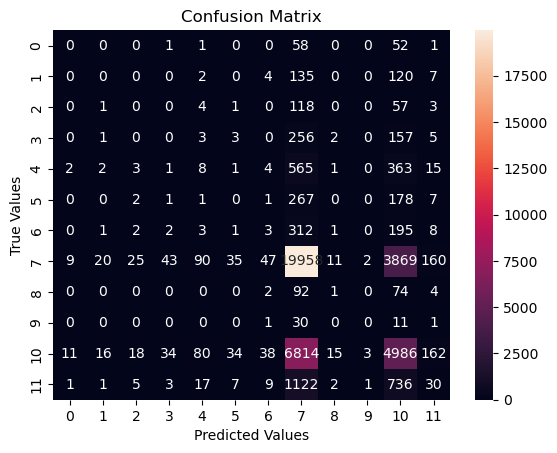

In [160]:
#cm = confusion_matrix(y_test, randomForestpred)
sns.heatmap(confusion_matrix(y_test, randomForestpred),annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

# KNN

In [129]:
# Importing the needed library to implementing KNN
from sklearn.neighbors import KNeighborsClassifier

In [180]:
# Creating an object of class KNeighborsClassifier with 12 neighbors,
#because in the target column there are 12 unique destinations
knnClassifier = KNeighborsClassifier(n_neighbors=12)

In [181]:
# using fit function from KNeighborsClassifier, the data have been fitted.
knnClassifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [182]:
knnPredictions = knnClassifier.predict(X_test)

/Users/sreekarreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [183]:
print('The accuracy of KNN Classifier is: ',accuracy_score(y_test,knnPredictions))

The accuracy of KNN Classifier is:  0.6087751371115173


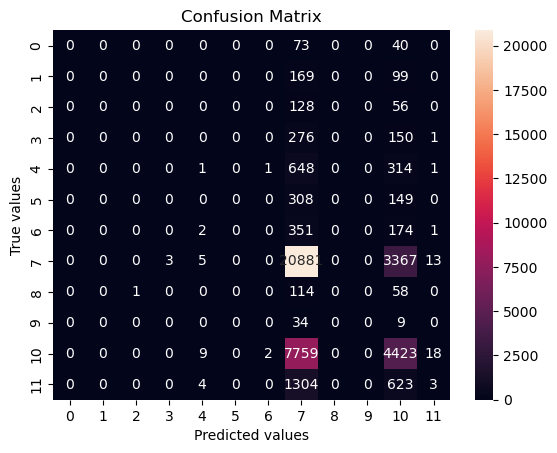

In [169]:
sns.heatmap(confusion_matrix(y_test, knnPredictions), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

# AdaBoost 

The accuracy of XGBoost Classifier is:  0.6187818724141249


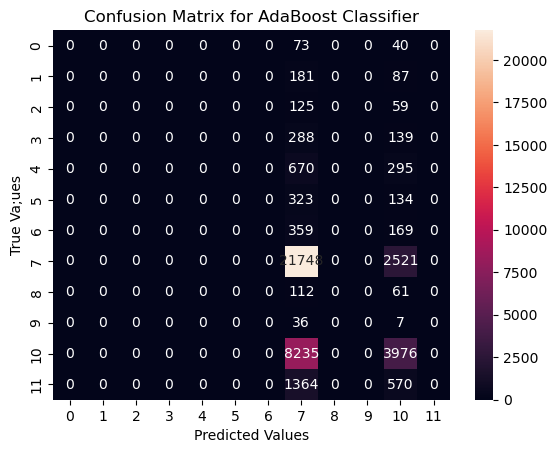

In [171]:
# Importing the required library to implement AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# Creating an object adaBoostModel of AdaBoostClassifier
adaBoostModel = AdaBoostClassifier(n_estimators = 12)

# Using the fit function from AdaBoost function, data has been fitted 
adaBoostModel.fit(X_train,y_train)

# Making predictions on X_test data using the predict function of the class AdaBoost
adaBoostPredictions = adaBoostModel.predict(X_test)

print('The accuracy of XGBoost Classifier is: ',accuracy_score(y_test,adaBoostPredictions))

sns.heatmap(confusion_matrix(y_test, adaBoostPredictions), annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('True Va;ues')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()


# XGBoost

In [137]:
# Importing the needed library to implement XGBoost
from xgboost import XGBClassifier

In [138]:
# Creating an object xgbModel of XBGClassifier
xgbModel = XGBClassifier()

In [139]:
# Using the fit function from XBGClassifier function, data has been fitted with default parameters.
xgbModel.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [140]:
# Making predictions on X_test data using the predict function of the class XGBClassifier
xgbPredictions = xgbModel.predict(X_test)

In [142]:
print('The accuracy of XGBoost Classifier is: ',accuracy_score(y_test,xgbPredictions))

The accuracy of XGBoost Classifier is:  0.6330222264986048


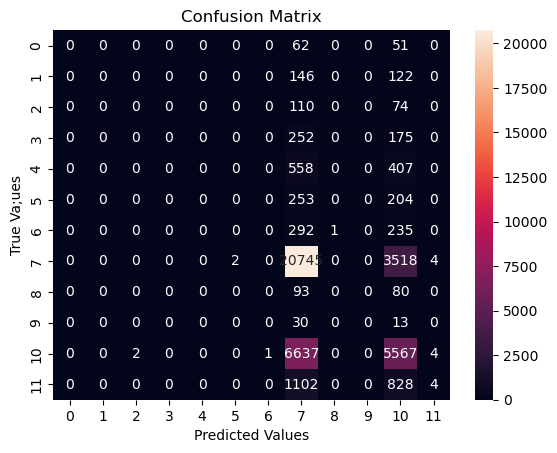

In [175]:
sns.heatmap(confusion_matrix(y_test, xgbPredictions), annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('True Va;ues')
plt.title('Confusion Matrix')
plt.show()